In [1]:
%matplotlib inline
from google2pandas import *
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
# API接続
start_index = 1

query = {\
    'ids'           : 'YOURVIEWID',
    'metrics'       : 'ga:totalEvents',
    'dimensions'    : ['ga:eventCategory', 'ga:eventAction', 'ga:eventLabel'],
    'start_date'    : 'yyyy-mm-dd',
    'end_date'      : 'yyyy-mm-dd',         
    'start_index'   : start_index,
    'max_results'   : 10000}

conn = GoogleAnalyticsQuery(
        token_file_name='my_analytics.dat',
    secrets='client_secret.json')

df, metadata = conn.execute_query(**query)

In [3]:
#本来は上記の通りGAから値を取得する・・・。サンプルデータをGAで作るのが面倒だったため。「sample_ga.csv」を用意した。
df = pd.read_csv('sample_ga.csv')
df = df.rename(index=df['eventLabel'])
df

,eventCategory,eventAction,eventLabel,totalEvents
T1,Ad_Rank,view,T1,45803
T2,Ad_Rank,view,T2,972235
T3,Ad_Rank,view,T3,798452
T4,Ad_Rank,view,T4,734943


In [4]:
# 広告ランクと価格と広告数
ad_rank_and_price ={'T1':10000, 'T2':20000, 'T3':30000, 'T4':40000}
ad_total = {'T1':3768, 'T2':3155, 'T3':2422, 'T4':1398}

#値が入ってない空のデータフレーム作成
df2 = pd.DataFrame(index=['T1','T2','T3','T4'], columns=['ad_price', 'ad_total'])

#広告価格と広告数を代入
for price in ad_rank_and_price.keys():
    df2['ad_price'][price] = ad_rank_and_price[price]
    
for total in ad_total.keys():
    df2['ad_total'][total] = ad_total[total]    

df2    

,ad_price,ad_total
T1,10000,3768
T2,20000,3155
T3,30000,2422
T4,40000,1398


In [5]:
#dfとdf2のマージ
df3 = pd.merge(df, df2,left_index=True, right_index=True)
df3

,eventCategory,eventAction,eventLabel,totalEvents,ad_price,ad_total
T1,Ad_Rank,view,T1,45803,10000,3768
T2,Ad_Rank,view,T2,972235,20000,3155
T3,Ad_Rank,view,T3,798452,30000,2422
T4,Ad_Rank,view,T4,734943,40000,1398


In [6]:
df3['ad_earnings'] = df3['ad_price'] * df3['ad_total']
df3['ad_value'] = df3['ad_earnings'] / df3['totalEvents']

In [7]:
df3

,eventCategory,eventAction,eventLabel,totalEvents,ad_price,ad_total,ad_earnings,ad_value
T1,Ad_Rank,view,T1,45803,10000,3768,37680000,822.654
T2,Ad_Rank,view,T2,972235,20000,3155,63100000,64.902
T3,Ad_Rank,view,T3,798452,30000,2422,72660000,91.0011
T4,Ad_Rank,view,T4,734943,40000,1398,55920000,76.0875


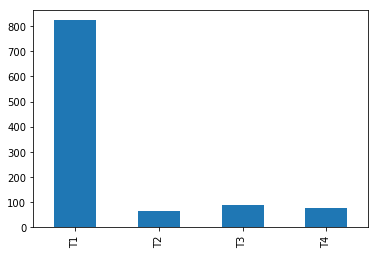

In [16]:
df3['ad_value'].plot(kind='bar')
plt.show()